<a href="https://colab.research.google.com/github/Bagautdino/LAB1/blob/main/Lab_1_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1 (numpy + matplotlib)

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
* На вход программа должна принимать 2 строки (т.е. должен быть реализован ввод с клавиатуры). Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.
* Систему уравнений необходимо решить матричным способом. Предусмотрите случаи, когда решения есть, решений нет, решений бесконечно много. Выведите ответ. Покажите решение на графике. Если решения есть, постройте график и точкой отметьте решение (если оно одно, например, функцией [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)). ГРАФИК СТРОИТСЯ ВО ВСЕХ ТРЕХ РАССМАТРИВАЕМЫХ СЛУЧАЯХ.

1 2 3
1 2 3
The system of equations has an infinite number of solutions


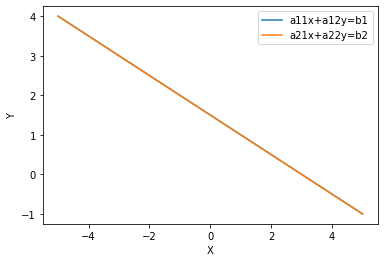

In [93]:
import numpy as np 
import matplotlib.pyplot as plt 

#Считывание исходных данных 
s1 = list(map(int, input().split())) 
s2 = list(map(int, input().split()))

#Построение графиков уравнений 
fig, ax = plt.subplots() 
plt.xlabel("X") 
plt.ylabel("Y") 
if s1[1] !=0 and s2[1]!=0:
  x = np.linspace(-5, 5)
  ax.plot(x, (s1[2]-s1[0]*x)/s1[1], label='a11x+a12y=b1') 
  ax.plot(x, (s2[2]-s2[0]*x)/s2[1], label='a21x+a22y=b2') 
else:
  y = np.linspace(-100, 100)
  ax.plot(y, (s1[2]-s1[1]*y)/s1[0], label = 'a11x+a12y=b1')
  ax.plot(y, (s2[2]-s2[1]*y)/s2[0], label = 'a11x+a12y=b1')

#Построение матриц 
matrix = np.array([[s1[0], s1[1]], [s2[0], s2[1]]]) 
matrix_x = np.array([[s1[2], s1[1]], [s2[2], s2[1]]]) 
matrix_y = np.array([[s1[0], s1[2]], [s2[0], s2[2]]]) 

#Вычисление определителей 
determinate = np.linalg.det(matrix) 
determinate_x = np.linalg.det(matrix_x) 
determinate_y = np.linalg.det(matrix_y) 

#Определение типа системы 
if determinate == 0: 
    if determinate_x == determinate_y == 0: 
        print('The system of equations has an infinite number of solutions') 
    else: 
        print('The system of equations has no solutions in real numbers') 
else: 
    x1 = determinate_x / determinate 
    y1 = determinate_y / determinate 
    print('The system of equations has a unique solution: \n', 
          'x =', x1, 'y =', y1) 
    plt.scatter(x1, y1, label='solution') 

#Демонстрация графиков 
plt.legend() 
plt.show()
 
 

# Задание 2 (pytorch + matplotlib)

Пусть $f(x) = \sin(x) * x$. Постройте график $f(x)$ и $\frac{df(x)}{dx}$, для расчета производных воспользуйтесь методом `backward()` и matplotlib для построения графиков.

In [63]:
import torch
from torch import autograd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
func = np.array([0.]*10001)
der = np.array([0.]*10001)
for i in range(len(func)*(-1) // 2, (len(func) // 2)):
  x = torch.tensor(i*0.1, requires_grad = True)
  y = torch.sin(x)*x
  y.backward()
  func[i] = x.grad.item()
  der[i] = y.item()

In [65]:
x = np.array([0.]*10001)
for i in range(len(x)*(-1) // 2, (len(x) // 2) + 1):
  x[i] = i * 0.1

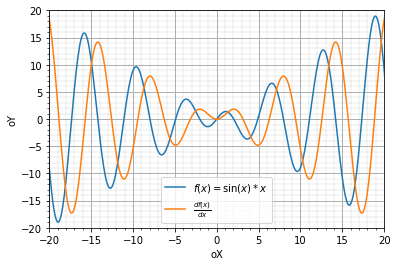

In [68]:
fig, ax = plt.subplots()
ax.plot(x, func, x, der)
ax.set(xlim=(-20, 20), ylim=(-20, 20))
ax.grid(which='major', linewidth=1.)
ax.grid(which='minor', linestyle='--', color='gray', linewidth=0.2)
ax.minorticks_on()
plt.legend([r"$ f(x) = \sin(x) * x $", r"$ \frac{df(x)}{dx} $"])
ax.set_xlabel('oX')
ax.set_ylabel('oY')
plt.grid(True)
plt.show()